# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [20]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "resources/city_data.csv"
ride_data_to_load = "resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [21]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


## Deliverable 1: Get a Summary DataFrame 

In [22]:
#  1. Get the total rides for each city type
total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [23]:
# 2. Get the total drivers for each city type
total_drivers = pyber_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [24]:
#  3. Get the total amount of fares for each city type
total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [25]:
#  4. Get the average fare per ride for each city type. 
avg_ride_fare = total_fares/total_rides
avg_ride_fare

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [26]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver = total_fares/total_drivers
avg_fare_per_driver

type
Rural       8.059460
Suburban    2.258615
Urban       0.668675
dtype: float64

In [27]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary =  {"Total Rides":total_rides, "Total Drivers": total_drivers, "Total Fares": total_fares, "Average Fare per Ride": avg_ride_fare, "Average Fare per Driver": avg_fare_per_driver}
pyber_summary_df = pd.DataFrame(pyber_summary)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,537,4327.93,34.623440,8.059460
Suburban,625,8570,19356.33,30.970128,2.258615
Urban,1625,59602,39854.38,24.525772,0.668675


In [28]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [29]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,.0f}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,.0f}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,537,"$4,327.93",$34.62,$8.06
Suburban,625,"8,570","$19,356.33",$30.97,$2.26
Urban,"1,625","59,602","$39,854.38",$24.53,$0.67


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [30]:
# 1. Read the merged DataFrame
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,537,"$4,327.93",$34.62,$8.06
Suburban,625,"8,570","$19,356.33",$30.97,$2.26
Urban,"1,625","59,602","$39,854.38",$24.53,$0.67


In [31]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
# for each date where the indices are the city type and date.
date_type_indices_pyber_data_df = pyber_data_df.groupby(["date","type"]).sum()[["fare"]]
date_type_indices_pyber_data_df.head(10)


,,fare
date,type,
2019-01-01 00:08:16,Urban,37.91
2019-01-01 00:46:46,Suburban,47.74
2019-01-01 02:07:24,Suburban,24.07
2019-01-01 03:46:50,Urban,7.57
2019-01-01 05:23:21,Urban,10.75
2019-01-01 09:45:36,Rural,43.69
2019-01-01 12:32:48,Suburban,25.56
2019-01-01 14:40:14,Urban,5.42
2019-01-01 14:42:25,Urban,12.31


In [32]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
date_type_indices_pyber_data_df = date_type_indices_pyber_data_df.reset_index()
date_type_indices_pyber_data_df.head(10)

,date,type,fare
0,2019-01-01 00:08:16,Urban,37.91
1,2019-01-01 00:46:46,Suburban,47.74
2,2019-01-01 02:07:24,Suburban,24.07
3,2019-01-01 03:46:50,Urban,7.57
4,2019-01-01 05:23:21,Urban,10.75
5,2019-01-01 09:45:36,Rural,43.69
6,2019-01-01 12:32:48,Suburban,25.56
7,2019-01-01 14:40:14,Urban,5.42
8,2019-01-01 14:42:25,Urban,12.31
9,2019-01-01 14:52:06,Suburban,31.15


In [33]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
data_type_pyber_data_pivot = date_type_indices_pyber_data_df.pivot(index ="date", columns = "type", values = "fare")
len(data_type_pyber_data_pivot)

2375

In [34]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
print(pyber_data_df[pyber_data_df['date'].str.contains(r'2019-04-28(?!$)')].tail(1))

jan1_to_apr29_df = data_type_pyber_data_pivot.loc["2019-01-01 00:08:16":"2019-04-28 19:35:03"]


                 city                 date   fare        ride_id  \
2227  Williamsonville  2019-04-28 19:35:03  16.96  9631291999264   

      driver_count      type  
2227             2  Suburban  


In [35]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
jan1_to_apr29_df.index = pd.to_datetime(jan1_to_apr29_df.index)

In [36]:
# 7. Check that the datatype for the index is datetime using df.info()
jan1_to_apr29_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [53]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
fare_by_week_df = jan1_to_apr29_df.resample("W").sum()
len(fare_by_week_df)

17

C:\Users\Noah\AppData\Local\Temp/ipykernel_4304/47906503.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_tick_labels, fontsize = 12)


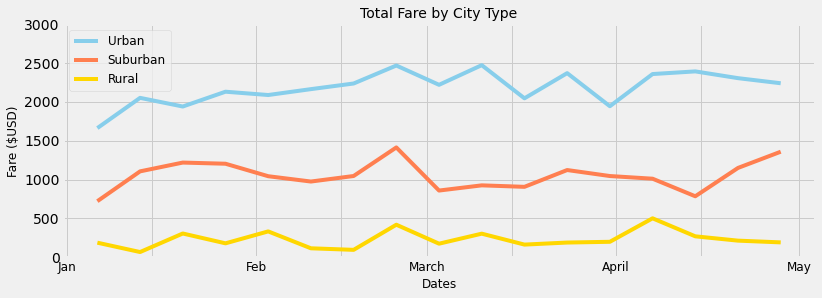

In [135]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
rural_weekly_fare = fare_by_week_df["Rural"]
suburban_weekly_fare = fare_by_week_df["Suburban"]
urban_weekly_fare = fare_by_week_df["Urban"]
dates = list(fare_by_week_df.index)

# Import the style from Matplotlib.
from matplotlib import style

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(12,4))

ax.plot(dates,urban_weekly_fare, label = "Urban", color = "skyblue")
ax.plot(dates,suburban_weekly_fare, label ="Suburban", color = "coral")
ax.plot(dates,rural_weekly_fare,label ="Rural", color = "gold")
ax.set_ylim(0,3000)
ax.set_ylabel("Fare ($USD)", fontsize = 12)
ax.set_xlabel("Dates", fontsize = 12)


x_tick_labels = ["Jan"," ", "Feb", "","March","", "April","","May"]

ax.set_xticklabels(x_tick_labels, fontsize = 12)
ax.set_title("Total Fare by City Type", fontsize = 14)
ax.legend(fontsize = 12)
ax.grid(True)



